In [24]:
import pandas as pd
import numpy as np

train  = pd.read_csv('Train.csv', header = 0)
test  = pd.read_csv('Test1.csv', header = 0)

In [25]:
test.head(5)

,FP93,FP97,FP182,FP250,FP464,FP536,FP579,FP868,ExtFP33,ExtFP99,ExtFP405,ExtFP511,ExtFP566,ExtFP630,ExtFP638,ExtFP710,GraphFP787,MACCSFP133
0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,1,0,1
1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,1
3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1


In [26]:
train.head(5)

,FP93,FP97,FP182,FP250,FP464,FP536,FP579,FP868,ExtFP33,ExtFP99,ExtFP405,ExtFP511,ExtFP566,ExtFP630,ExtFP638,ExtFP710,GraphFP787,MACCSFP133
0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0
1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1
3,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1


In [27]:
train['model'] = "Train"
test['model'] = "Test"

In [28]:
frames = [train,test]
pca = pd.concat(frames)
pca.head(8)

,FP93,FP97,FP182,FP250,FP464,FP536,FP579,FP868,ExtFP33,ExtFP99,ExtFP405,ExtFP511,ExtFP566,ExtFP630,ExtFP638,ExtFP710,GraphFP787,MACCSFP133,model
0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,Train
1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,Train
2,0,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,Train
3,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,Train
4,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,1,1,Train
5,0,0,1,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,Train
6,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,0,1,Train
7,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,1,1,1,Train


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Plot the Figures Inline
%matplotlib inline


def PCA_plot(data):
    # PCA's components graphed in 2D and 3D
    # Apply Scaling 
    from sklearn.decomposition import PCA
    from mpl_toolkits.mplot3d import Axes3D
    from sklearn.preprocessing import StandardScaler
    from matplotlib import pyplot as plt
    data_pca = data
    
    # Apply Scaling 
    X = data_pca.drop('model', axis=1).as_matrix().astype(np.float)
    y = data_pca['model'].values
    
    # Formatting
    target_names = ['Train','Test']
    colors = ['blue','red']
    lw = 0
    alpha = 0.3

    # 2 Components PCA
    plt.style.use('seaborn-whitegrid')
    plt.figure(2, figsize=(20, 8))

    plt.subplot(1, 2, 1)
    pca = PCA(n_components=2)
    X_std = StandardScaler().fit_transform(X)
    X_r = pca.fit_transform(X_std)
    #X_r = pca.fit(X).transform(X)
        
    for color, i, target_name in zip(colors, ['Train','Test'], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                    color=color, 
                    alpha=alpha, 
                    lw=lw,
                    label=target_name)
    plt.xlabel("PC1", weight= 'bold')
    plt.ylabel("PC2", weight= 'bold')
    #plt.legend(loc='best', shadow=False, scatterpoints=1)
    #plt.title('First two PCA directions');

    # 3 Components PCA
    ax = plt.subplot(1, 2, 2, projection='3d')

    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(X_std)
    for color, i, target_name in zip(colors, ['Train','Test'], target_names):
        ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
                   color=color,
                   alpha=alpha,
                   lw=lw, 
                   label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_xlabel("PC1", weight= 'bold')
    ax.set_ylabel("PC2", weight= 'bold')
    ax.set_zlabel("PC3", weight= 'bold')

    # rotate the axes
    ax.view_init(30, 10)
    plt.savefig('applicability_domain.pdf', dpi=300)

c:\ProgramData\Anaconda3\envs\muzota-env\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


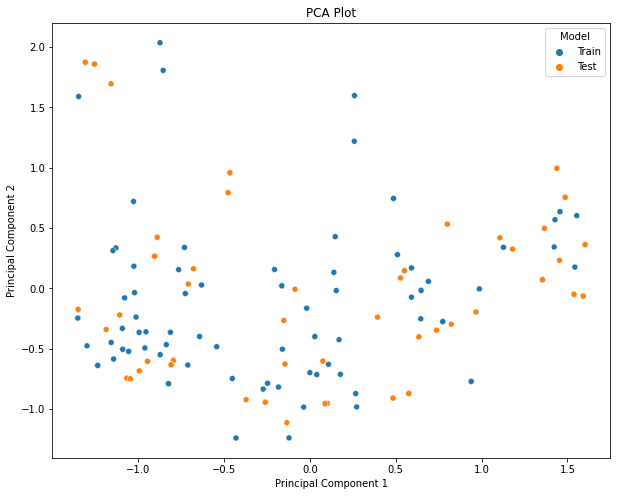

In [43]:
PCA_plot(pca)
pca .to_csv('applicability_domain_data.csv' , sep=',' ,index=False)